In [1]:
from __future__ import division
from neuron import h
from neuron import gui
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

## Create model

In [2]:
# create model
soma = h.Section(name="soma")
soma.L    = 10 # the length of the soma
soma.diam = 10 # the diameter of the soma
soma.Ra   = 100 # tha axial resistance
soma.insert('pas') # add passive properties 
soma.g_pas = 1/10000 # set the specific membrane to 10000 ohm*cm^2

## add active conductances (the channels [mod files] are from Mainen and Sejnowski 1996)

In [3]:
soma.insert('kv') # add potassium channel | a mod file
soma.gbar_kv = 2000 # set the potassium conductance

soma.insert('na') # add sodium channel | a mod file
soma.gbar_na = 8000 # set the sodium conductance
h.celsius = 30


## Create Current Clamp and set the variables for the current injection

In [4]:
stim = h.IClamp(soma(0.5))
stim.delay = 250 # start of the current injection (ms)
stim.dur   = 1000 # duration (ms)
stim.amp   = 0.007446 # amplitude (nA)

# record voltage of soma and injected current and the time

In [5]:
soma_v = h.Vector()
soma_v.record(soma(0.5)._ref_v)

stim_current = h.Vector()
stim_current.record(stim._ref_i)

t = h.Vector()
t.record(h._ref_t)

Vector[5]

# set starting voltage, run time, and run the simulation

In [6]:
h.tstop = 1500 # set the simulation time
h.v_init = -70
# run simulation
h.run()

0.0

# plot the injected current and the voltage response

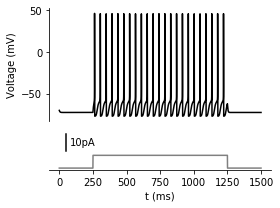

In [7]:
f, (ax0, ax1) = plt.subplots(2,1, figsize=(4,3), gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(t,soma_v, 'k')
ax1.plot(t,stim_current, 'gray')

ax0.set_ylabel('Voltage (mV)')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


ax1.plot([50,50],[0.01,0.02],'k')
ax1.text(80,0.015,'10pA',va='center')
ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.tight_layout()